# HW5 Q2

Firstly, let me explain the symbols.
- $x_i$: individual data point
- $\bar x$: sample mean
- $μ$: population mean
- $μ_0$: population mean under $H_0$

Then, let me explain the sentence, "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population."

- The conclusion from the hypothesis testing is referring to the population since we are making hypotheses on our population which is the widest and most complete sample. For example, we claim something about our $μ_0$ in Null Hypothesis; then we reject or can't reject Null Hypothesis after testing by using a small sample. As a result, we get an implication for our population mean $μ$.

## GPT's summaries
- https://chatgpt.com/share/670dc1ce-3b70-8006-8695-391fd1d71f82

# HW5 Q4
Smaller the p-value, rarer/more extreme the situation, so the $H_0$ (Null Hypothesis usually stands for no effect/change) is more ridiculous. Specifically, p-value describes the probability to have a situation as we assumed in $H_0$, so obviously a small p-value from a sample rejects our $H_0$ strongly.

# HW5 Q8
**Question**
- 49 out of a sample of 80 students are able to correctly state which was poured first.
- Do students really have the ability to distinguish which was poured first?

**Hypothesis**
- $H_0$: $μ=0.5$ (comment: this Null hypothesis stands for that all students are guessing so the expectation is 0.5)
- $H_1$: $μ>0.5$ (comment: $H_1$ should be a two-tailed testing but I only want to test whether students have the ability to distinguish instead of lack of ability — $μ>0.5$ indicates that students have the ability to distinguish)
- I will use a 5% significance level $α$ to judge my $H_0$.

Firstly, I will create 10,000 bootstrapped dataset with a sample size 80 from an assumed 50/50 sample which indicates $μ=0.5$ (under $H_0$), and plot the mean-against-frequency histogram. 

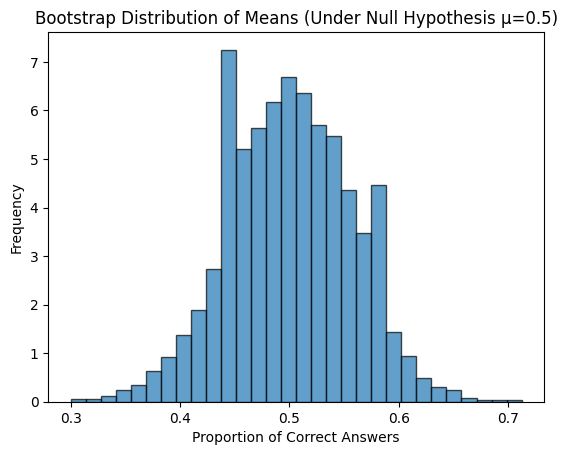

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Given data
n_students = 80
null_proportion = 0.5  # Assume population mean is 0.5 under the null hypothesis

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Bootstrap simulation
bootstrap_means = []
for _ in range(n_bootstrap_samples):
    # Resample with replacement from a binomial distribution with p = 0.5
    sample = np.random.choice([0, 1], size=n_students, p=[1 - null_proportion, null_proportion])
    bootstrap_mean = np.mean(sample)
    bootstrap_means.append(bootstrap_mean)

# Convert to numpy array for easy calculations
bootstrap_means = np.array(bootstrap_means)

# Normalize the histogram to have area=1 (density=True)
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7, density=True)
plt.title('Bootstrap Distribution of Means (Under Null Hypothesis μ=0.5)')
plt.xlabel('Proportion of Correct Answers')
plt.ylabel('Frequency')
plt.show()



- Then, I will mark the 95% Confidence Interval since $α=0.05$

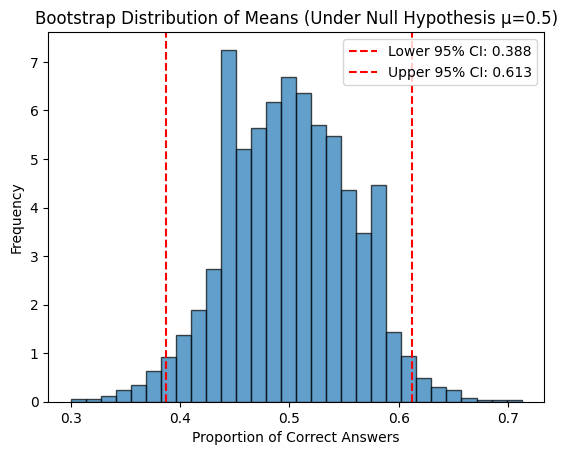

In [4]:
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7, density=True)
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower 95% CI: {ci_lower:.3f}')
plt.axvline(ci_upper, color='red', linestyle='--', label=f'Upper 95% CI: {ci_upper:.3f}')
plt.title('Bootstrap Distribution of Means (Under Null Hypothesis μ=0.5)')
plt.xlabel('Proportion of Correct Answers')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Then we can calculate the t-statistic of our given sample 49/80, which is 0.6125.

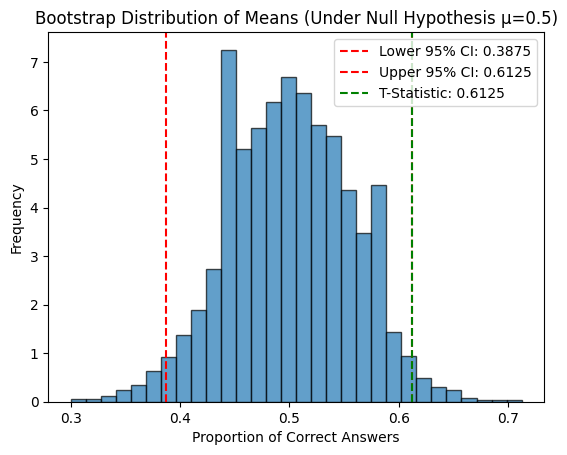

In [5]:
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7, density=True)
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower 95% CI: {ci_lower:.4f}')
plt.axvline(ci_upper, color='red', linestyle='--', label=f'Upper 95% CI: {ci_upper:.4f}')
plt.axvline(0.6125, color='green', linestyle='--', label=f'T-Statistic: {ci_upper:.4f}')
plt.title('Bootstrap Distribution of Means (Under Null Hypothesis μ=0.5)')
plt.xlabel('Proportion of Correct Answers')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Interestingly, our t-statistic just fall into the CI, which means that we don't have enough evidence to reject $H_0$.
- Since t-statistic <= critical value (97.5% percentile), the p-value isn't small enough to reject $H_0$. In this case, p-value = 0.05 which is our significance level $α$, which is too big to reject $H_0$.

## Conclusion
- Can't reject $H_0$, so students have the ability to distinguish whether tea/milk was poured first.

## GPT's summaries
- https://chatgpt.com/share/670dd991-8610-8006-99f7-a0fcb77e949e